# 0.0 Imports

In [100]:
import pandas as pd
import numpy as np
import pickle
import json



import seaborn as sns
import scikitplot as skplt

import matplotlib.pyplot as plt

import sweetviz as sv

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model as lm
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import top_k_accuracy_score



# 0.1 functions

# 0.2 Loading Dataset

In [2]:
data = pd.read_csv('../dataset/train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0 data descriptionn

In [3]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [4]:
df1 = data.copy()
df1 = df1.rename(columns=lambda x: x.lower())            


Rename columns 

In [5]:
 # 1.1 Raneme Columns
cols_new =  ['id', 'gender', 'age', 'driving_license', 'region_code','previously_insured', 'vehicle_damage', 'annual_premium','policy_sales_channel', 'vintage', 'response','vvehicle_age_below_1_year', 'vvehicle_age_between_1_2_year']   


# 1.1 Data Dimension

In [6]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Col: {}'.format(df1.shape[1]))

Number of Rows: 381109
Number of Col: 12


# 1.2 data types

In [7]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

# 1.3 Check NA

In [8]:
df1.isna().sum() #/ len(df1)*100

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

In [9]:
# rot direct api/

# 1.4 Data Descriptive

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
driving_license,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
region_code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
previously_insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
annual_premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
policy_sales_channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [11]:
num_attributes = df1.select_dtypes( include=['int64','float64'] )
cat_attributes = df1.select_dtypes( exclude= ['int64', 'float64'] )

In [12]:
# Central tendency - mean, mediana
ct1 = pd.DataFrame(num_attributes.apply(np.mean))
ct2 = pd.DataFrame(num_attributes.apply(np.median))

# dispersion - std,num_attributesge, skew, kurtosis
d1  = pd.DataFrame(num_attributes.apply(np.std))
d2  = pd.DataFrame(num_attributes.apply(min))
d3  = pd.DataFrame(num_attributes.apply(max))
d4  = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min()))
d5  = pd.DataFrame(num_attributes.apply(lambda x: x.skew()))
d6  = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis()))

# concatenar
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6], axis=1)
# Renomear as colunas
m.columns = ['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

# Exibir o DataFrame com as colunas renomeadas
m

,min,max,range,mean,median,std,skew,kurtosis
id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0 Feature Enginier

In [13]:
df2 = df1.copy()

In [14]:
df2['vehicle_age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [15]:
# Convertendo a coluna para tipo string
df2['vehicle_damage'] = df2['vehicle_damage'].map({'Yes': 1, 'No': 0})

# Transformando em over e betwen
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' 
                                                                       if x == '1-2 Year' else 'below_1_year')

# 3.0 Data Filtering

In [16]:
df3 = df2.copy()

# 4.0 EDA

In [17]:
df4 = df3.copy()

# 4.1 Univariate Analysis

In [18]:
df4.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

In [19]:
import sweetviz as sv

# Assuming you have a dataframe df4
#report = sv.analyze(df4)

# Save the report as an HTML file
#report.show_html('sweetviz_report.html')



/var/folders/ws/9gpb0_fn3cq7vzb6mxqc169c0000gn/T/ipykernel_2056/412156913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='response', y='age', data=df4, palette=cores)


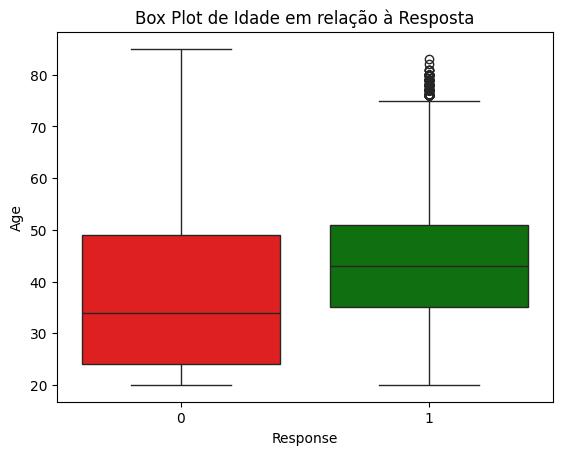

In [20]:
# Age 
# medir a variacao = mediana de cada um dos grupos em relaçao as idades = grup de pessoas inter e nao intere distribicao dessas idades

# Suponha que 'df4' é o seu DataFrame
cores = [ 'red', 'green']
sns.boxplot(x='response', y='age', data=df4, palette=cores) 
# Rótulos e título
plt.xlabel('Response')
plt.ylabel('Age')
plt.title('Box Plot de Idade em relação à Resposta')
# Exiba o gráfico
plt.show()


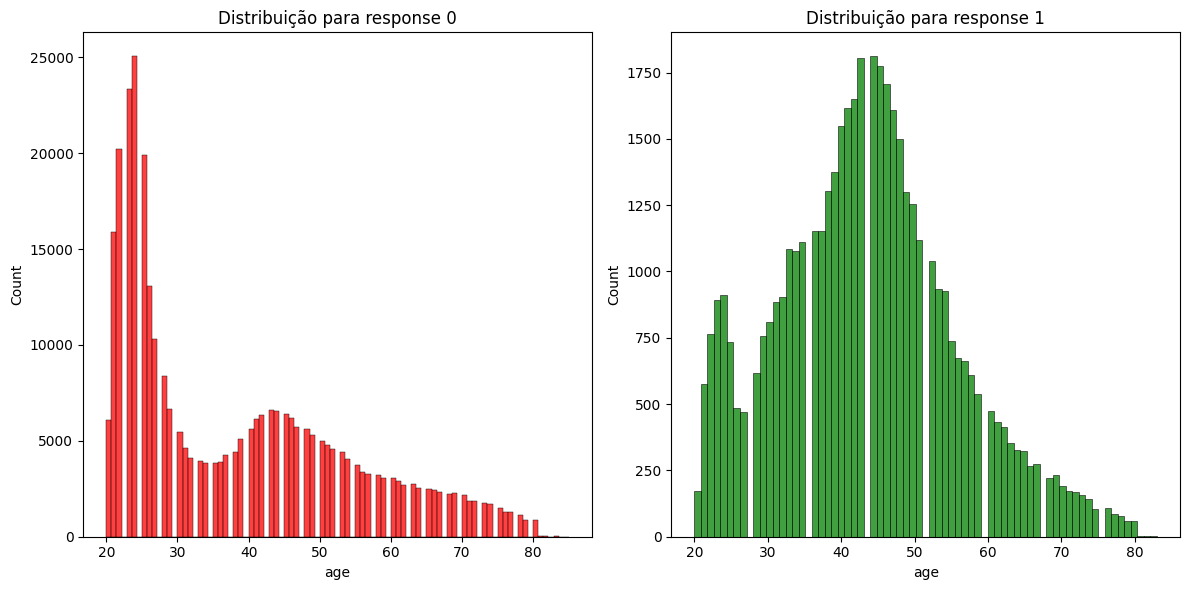

In [21]:
# Crie uma figura com um tamanho específico
plt.figure(figsize=(12, 6))


# Distribuição de var contínua == 0
aux00 = df4.loc[df4['response'] == 0, 'age']
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
sns.histplot(aux00, color='red')
plt.title('Distribuição para response 0')

# Distribuição de var contínua == 1
aux01 = df4.loc[df4['response'] == 1, 'age']
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico
sns.histplot(aux01, color='green')
plt.title('Distribuição para response 1')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exiba o gráfico
plt.show()


In [22]:
df4['annual_premium'].min()

2630.0

/var/folders/ws/9gpb0_fn3cq7vzb6mxqc169c0000gn/T/ipykernel_2056/72832730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='response', y='annual_premium', data=aux, palette=cores)


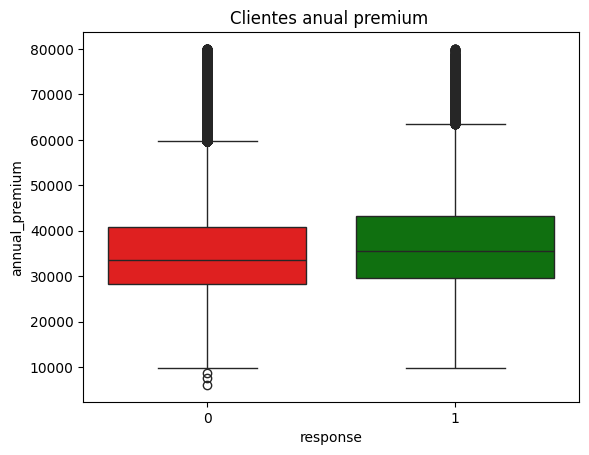

In [23]:
# 'annual_premium'
cores=('red', 'green')
aux = df4[(df4['annual_premium'] > 2630) & (df4['annual_premium'] < 80000)]
sns.boxplot(x='response', y='annual_premium', data=aux, palette=cores)

plt.xlabel('response')
plt.ylabel('annual_premium')
plt.title('Clientes anual premium ')
plt.show()


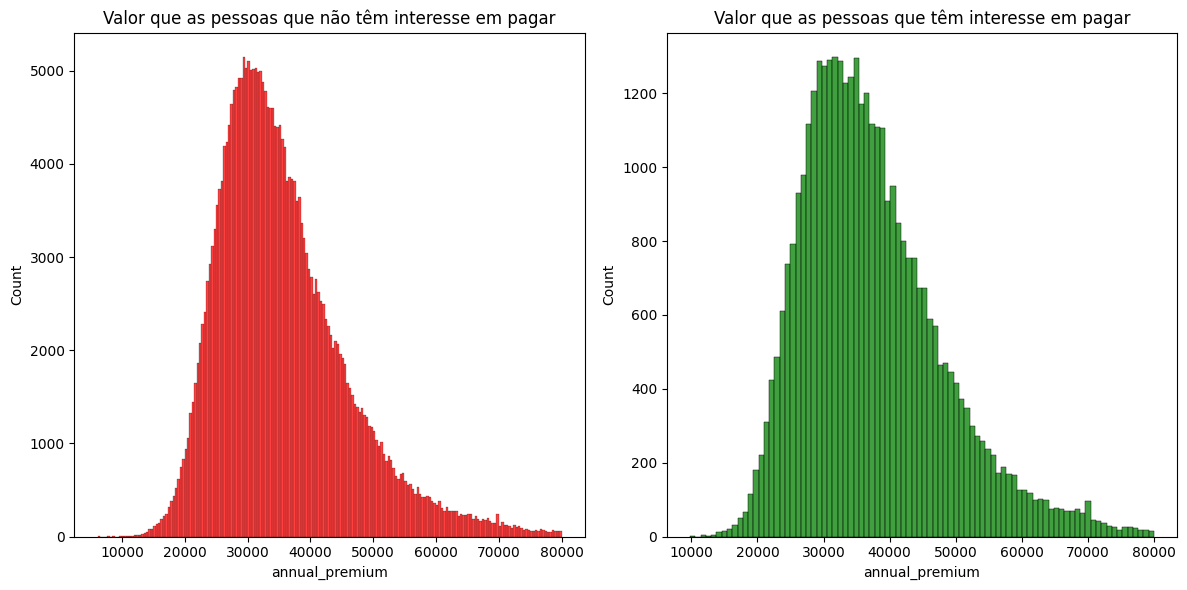

In [24]:
# Crie uma figura com um tamanho específico
plt.figure(figsize=(12, 6))

# Gráfico para response == 0
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
plt.subplot(1, 2, 1)
sns.histplot(aux00, color='red')
plt.title('Valor que as pessoas que não têm interesse em pagar')

# Gráfico para response == 1
aux01 = aux.loc[aux['response'] == 1, 'annual_premium']
plt.subplot(1, 2, 2)
sns.histplot(aux01, color='green')
plt.title('Valor que as pessoas que têm interesse em pagar')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exiba o gráfico
plt.show()


/var/folders/ws/9gpb0_fn3cq7vzb6mxqc169c0000gn/T/ipykernel_2056/282862677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='response', y='driving_license', data=aux, palette=cores);


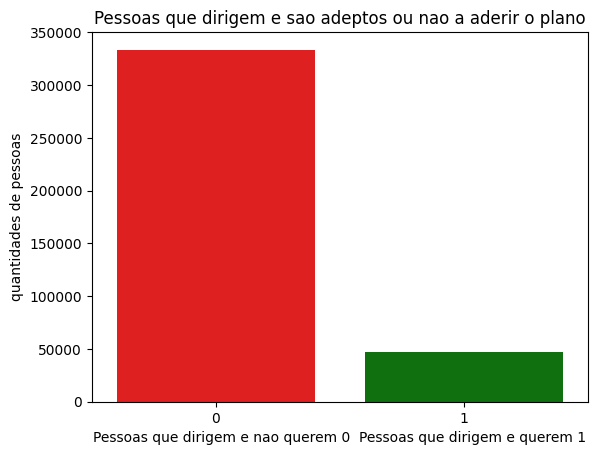

In [25]:
# Driving_license Soma Agregado
aux = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
cores = ( 'red', 'green')
sns.barplot(x='response', y='driving_license', data=aux, palette=cores);
plt.title('0 nao responde 1 responde')

plt.xlabel('Pessoas que dirigem e nao querem 0  Pessoas que dirigem e querem 1')
plt.ylabel('quantidades de pessoas')
plt.title('Pessoas que dirigem e sao adeptos ou nao a aderir o plano')
plt.show()


In [26]:
aux0  = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
aux0.head()

,response,driving_license
0,0,333628
1,1,46669


In [27]:
aux['driving_lincense_perc'] = aux['driving_license']/aux['driving_license'].sum()
aux.head()

# parece descriminativa mais tem que ser comparada com outra coisa para agregar mais 

,response,driving_license,driving_lincense_perc
0,0,333628,0.877283
1,1,46669,0.122717


<Axes: xlabel='region_code', ylabel='id'>

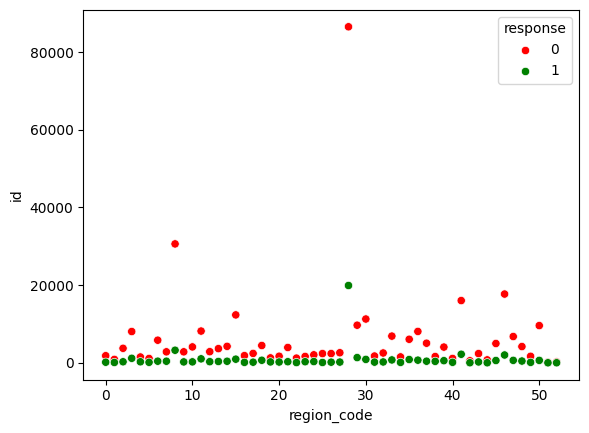

In [28]:
# Region code
cores = ( 'red', 'green')
aux0 = df4[['id', 'region_code', 'response']].groupby(['region_code','response']).count().reset_index()
sns.scatterplot(x='region_code', y= 'id', hue='response', data=aux0, palette=cores )

In [29]:
# previously_insured
# tabela de contigencia , conta quantas pessoas nao tiveram aterior um segura e nao querem um produto em relacao a quantas paeeosa nao tiveram o produto antes e querm o produto 
# Validaccao cruzada
pd.crosstab(df4['previously_insured'], df4['response'])

response,0,1
previously_insured,,
0,159929,46552
1,174470,158


In [30]:
pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x/ x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [31]:
# 
df4[['vehicle_age', 'response']].value_counts().sort_values(ascending=True).reset_index()

,vehicle_age,response,count
0,over_2_years,1,4702
1,below_1_year,1,7202
2,over_2_years,0,11305
3,between_1_2_year,1,34806
4,below_1_year,0,157584
5,between_1_2_year,0,165510


In [32]:
#  pessoa que tem carros mais novos , acima de 2 anos , ate 2 anos e para caoors que nao sao tao novos 
# Pessoas que tem carros em determinados anos e dizem que quer e nao quer em porcentagens e en quantidade 


df4[['vehicle_age', 'response']].value_counts( normalize=True ).reset_index()

,vehicle_age,response,proportion
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


/var/folders/ws/9gpb0_fn3cq7vzb6mxqc169c0000gn/T/ipykernel_2056/1559783319.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='response', y='policy_sales_channel', data=aux_, ci=None, dodge=True)


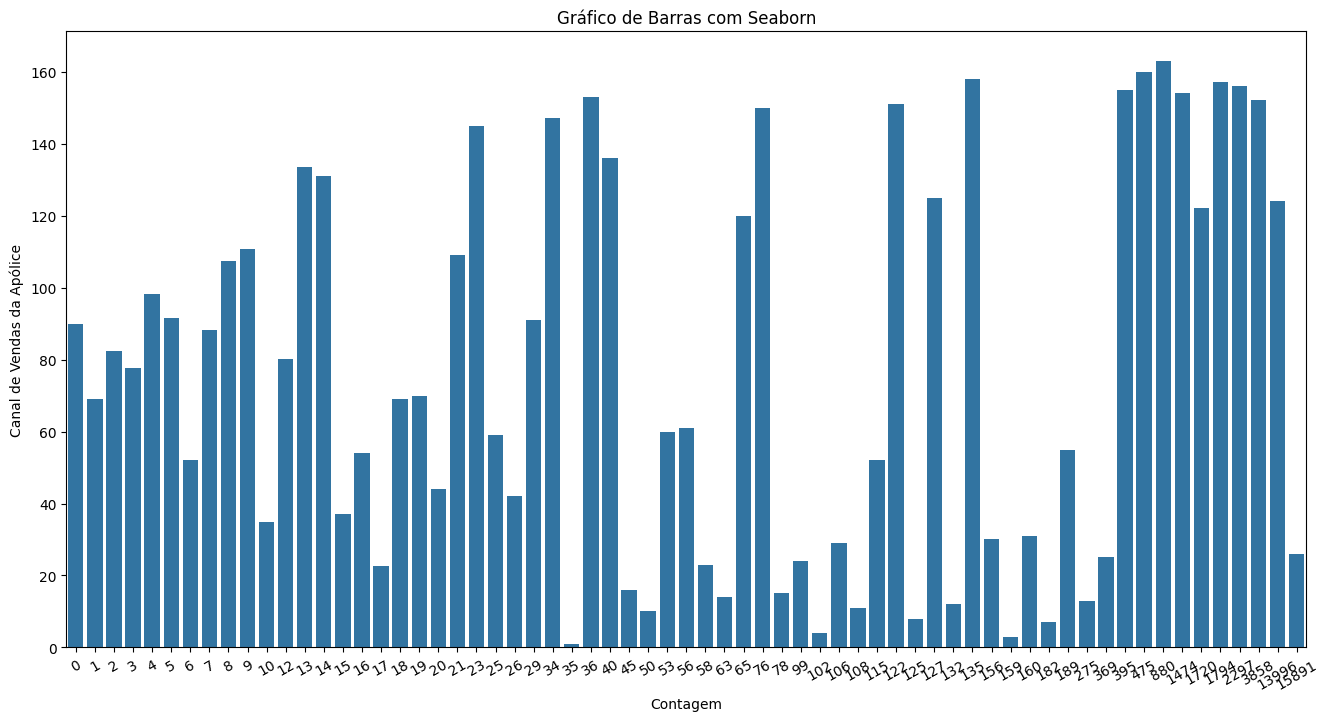

In [33]:
# Tamanho da figura
plt.figure(figsize=(16, 8))  # Ajuste o tamanho conforme necessário

# Agrupamento e soma das ocorrências por 'policy_sales_channel'
aux_ = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()

# Criando um gráfico de barras
sns.barplot(x='response', y='policy_sales_channel', data=aux_, ci=None, dodge=True)

# Adicionando legendas e título
plt.xlabel('Contagem')
plt.ylabel('Canal de Vendas da Apólice')
plt.title('Gráfico de Barras com Seaborn')

# Inclinando o eixo x em 30 graus (ajuste conforme necessário)
plt.xticks(rotation=30)

# Exibindo o gráfico
plt.show()


/var/folders/ws/9gpb0_fn3cq7vzb6mxqc169c0000gn/T/ipykernel_2056/2850845531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='response', y='vintage', data=df4, palette=cores)


<Axes: xlabel='response', ylabel='vintage'>

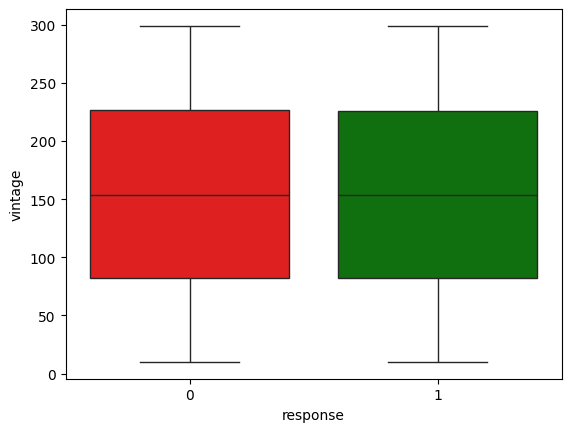

In [34]:
# 'vintage'
cores = ( 'red', 'green')
sns.boxplot(x='response', y='vintage', data=df4, palette=cores)


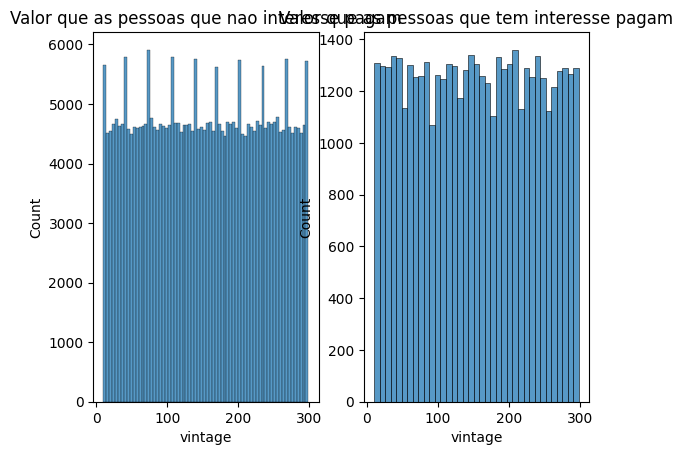

In [35]:
# Gráfico para response == 0
df400 = df4.loc[df4['response'] == 0, 'vintage']
plt.subplot(1,2,1)
sns.histplot(df400)
plt.title('Valor que as pessoas que nao interesse pagam')

# Gráfico para response == 1
df401 = df4.loc[df4['response'] == 1, 'vintage']
plt.subplot(1,2,2)  # Mudei o número do subplot para 2
sns.histplot(df401)
plt.title('Valor que as pessoas que tem interesse pagam')

plt.show()


# 5.0 Data Preparation

In [36]:
df5 = df4.copy()

se pegar : 
df5['annual_primium'].head() = series - que monta o dataframe
df5[['annual_primium']] me passa a coluna 
df5[['annual_primium']].values() pega so o que tem dentro e retorna um array




# Separacao treino e teste 

In [37]:
# Exemplos de dados que vem de producao 

X = df4.drop('response', axis=1)
y = df4['response'].copy()

X_train, X_validation, y_train, y_validation = ms.train_test_split(X, y, test_size=0.20)


df5 = pd.concat( [X_train, y_train], axis=1 )

In [38]:
# Supondo que você tenha os conjuntos X_train, X_val, y_train e y_val
print("Tamanho de X_train:", len(X_train))
print("Tamanho de X_val:", len(X_validation))
print("Tamanho de y_train:", len(y_train))
print("Tamanho de y_val:", len(y_validation))


Tamanho de X_train: 304887
Tamanho de X_val: 76222
Tamanho de y_train: 304887
Tamanho de y_val: 76222


## Standardization 
(subtrai a media e divide pelo desvio padrao)

In [39]:
# .ft Calcula a med std da coluna e fazz subtraca e grav an var original e subscreve

ss = pp.StandardScaler() # = calc a med e o std da col e vai fazer as subtracoes e grava nas var orig
# annual_premium 
df5[ 'annual_premium' ] = ss.fit_transform( df5[ [ 'annual_premium' ] ].values )    

In [40]:
pickle.dump( ss, open( '../src/features/annual_primium_scaler.pkl', 'wb'  ) )

# rescaling 
(rescala dos inytervalos que fica entre 0 e 1)

In [41]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# age
df5['age'] = mms_age.fit_transform(df5[['age']].values)
pickle.dump(mms_age, open('../src/features/age_scaler.pkl', 'wb'))

# vintage
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)
pickle.dump(mms_vintage, open('../src/features/vintage_scaler.pkl', 'wb'))


# Encoder 
(Muda o tipo da var de cat para num)

In [42]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# age
df5['age'] = mms_age.fit_transform(df5[['age']].values)
pickle.dump(mms_age, open('../src/features/age_scaler.pkl', 'wb'))

# vintage
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)
pickle.dump(mms_vintage, open('../src/features/vintage_scaler.pkl', 'wb'))




# gender - One Hot encoding / Target Encoding
target_encoding_gender = df5.groupby( 'gender' )[ 'response' ].mean()
df5.loc[:, 'gender' ] = df5['gender'].map(target_encoding_gender)
# Pickle
pickle.dump( target_encoding_gender, open( '../src/features/target_encoding_gender_scaler.pkl', 'wb' ) )

# region_code One hot Encoding / Frequency Encoding / Target Encoding
target_encoding_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encoding_region_code)
# Pickle
pickle.dump( target_encoding_region_code, open( '../src/features/target_encoding_region_code_scaler', 'wb' ) )

# policy_sales_channel
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len( df5 )
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )
# Pickle
pickle.dump( fe_policy_sales_channel, open( '../src/features/fe_policy_sales_channel_scaler', 'wb' ) )



# Vehicle age (One encode e frequenci encoding)

df5 = pd.get_dummies( df5, prefix='vvehicle_age', columns=['vehicle_age'])

target_encoding_region_code: Calcula a média da variável de resposta ('response') para cada valor único em 'region_code' e armazena em target_encoding_region_code.
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encoding_region_code): Substitui os valores na coluna 'region_code' pelos valores médios calculados anteriormente. Isso é uma forma de Target Encoding.
pd.get_dummies(df5, prefix='vehicle_age', columns=['vehicle_age']): Aplica One-Hot Encoding à variável categórica 'vehicle_age', criando colunas binárias separadas para cada categoria e adicionando um prefixo ("vehicle_age") a essas colunas.
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len(df5): Calcula a frequência relativa de cada valor único em 'policy_sales_channel'.
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel): Substitui os valores na coluna 'policy_sales_channel' pelos valores de frequência relativa calculados anteriormente. Isso é uma forma de Frequency Encoding.
Essas transformações estão sendo aplicadas às colunas específicas do DataFrame df5 para preparar os dados para um modelo de machine learning. A escolha entre One-Hot Encoding, Frequency Encoding ou Target Encoding para 'region_code' e 'policy_sales_channel' 

In [43]:
df5.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vvehicle_age_below_1_year,vvehicle_age_between_1_2_year,vvehicle_age_over_2_years
89860,89861,0.103392,0.015385,1,0.073842,1,0,0.133530,0.353747,0.916955,0,True,False,False
203229,203230,0.103392,0.123077,1,0.134194,0,1,0.015447,0.353747,0.494810,0,True,False,False
153222,153223,0.103392,0.092308,1,0.125247,1,0,-0.197392,0.353747,0.010381,0,True,False,False
121966,121967,0.103392,0.138462,1,0.128087,1,0,-0.487853,0.353747,0.591696,0,True,False,False
343306,343307,0.138429,0.353846,1,0.186182,1,0,1.618886,0.209284,0.051903,0,False,True,False


# 5.4  Validation Preparation

In [44]:
print(X_validation.columns)


Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage'],
      dtype='object')


In [45]:
# preparacao dos daos de validacao 

# gender
X_validation.loc[:, 'gender'] = X_validation.loc[:,'gender'].map(target_encoding_gender)

# age
X_validation.loc[:, 'age'] = mms_age.transform(X_validation[['age']].values)

# region_code
X_validation.loc[:, 'region_code'] = X_validation.loc[:, 'region_code'].map(target_encoding_region_code)

# vehicle_age
X_validation = pd.get_dummies( X_validation, prefix='vehicle_age', columns=['vehicle_age'] )

# annual_primium
X_validation.loc[:, 'annual_premium'] = ss.transform(X_validation[['annual_premium']].values)

# policy_sales_chanel
X_validation.loc[:, 'policy_sale_channel'] = X_validation['policy_sales_channel'].map(fe_policy_sales_channel)

# vintage
X_validation.loc[:, 'vintage'] = mms_vintage.transform(X_validation[['vintage']].values)

# fillna
X_validation = X_validation.fillna(0)

In [46]:
# Supondo que você tenha os conjuntos X_train, X_val, y_train e y_val
print("Tamanho de X_train:", len(X_train))
print("Tamanho de X_val:", len(X_validation))
print("Tamanho de y_train:", len(y_train))
print("Tamanho de y_val:", len(y_validation))


Tamanho de X_train: 304887
Tamanho de X_val: 76222
Tamanho de y_train: 304887
Tamanho de y_val: 76222


In [47]:
df5.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vvehicle_age_below_1_year,vvehicle_age_between_1_2_year,vvehicle_age_over_2_years
89860,89861,0.103392,0.015385,1,0.073842,1,0,0.133530,0.353747,0.916955,0,True,False,False
203229,203230,0.103392,0.123077,1,0.134194,0,1,0.015447,0.353747,0.494810,0,True,False,False
153222,153223,0.103392,0.092308,1,0.125247,1,0,-0.197392,0.353747,0.010381,0,True,False,False
121966,121967,0.103392,0.138462,1,0.128087,1,0,-0.487853,0.353747,0.591696,0,True,False,False
343306,343307,0.138429,0.353846,1,0.186182,1,0,1.618886,0.209284,0.051903,0,False,True,False


# 6.0 Feature Selection

In [48]:
df6 = df5.copy()

## 6.2 Feature de Importancia

In [49]:
# Model definition
forest = en.ExtraTreesClassifier(n_estimators=250, random_state=0, n_jobs=-1)

# Data preparation
X_train_n = df5.drop(['id', 'response'], axis=1)
y_train_n = y_train.values
forest.fit(X_train_n, y_train_n)



ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

In [50]:
# Supondo que você tenha os conjuntos X_train, X_val, y_train e y_val
print("Tamanho de X_train:", len(X_train))
print("Tamanho de X_val:", len(X_validation))
print("Tamanho de y_train:", len(y_train))
print("Tamanho de y_val:", len(y_validation))


Tamanho de X_train: 304887
Tamanho de X_val: 76222
Tamanho de y_train: 304887
Tamanho de y_val: 76222


Feature ranking:
                         feature  importance
0                        vintage    0.275285
0                 annual_premium    0.245456
0                            age    0.163903
0                    region_code    0.103897
0                 vehicle_damage    0.067633
0           policy_sales_channel    0.060444
0             previously_insured    0.056052
0      vvehicle_age_below_1_year    0.013642
0  vvehicle_age_between_1_2_year    0.005921
0                         gender    0.004910
0      vvehicle_age_over_2_years    0.002348
0                driving_license    0.000510


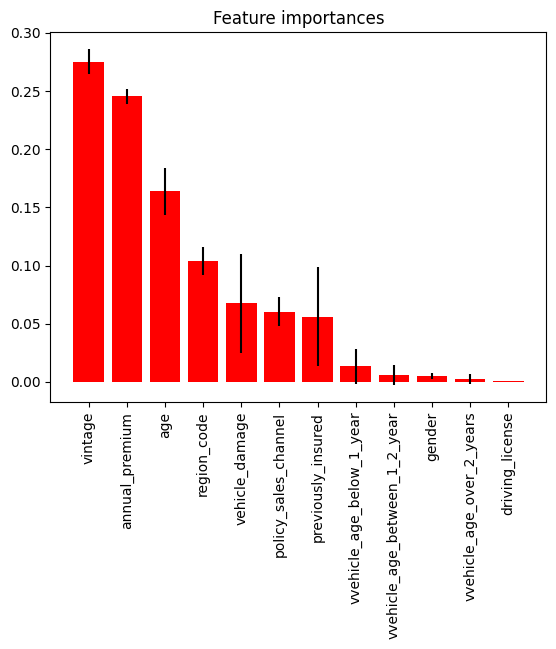

In [51]:
# Arvores de Importancias 


importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print('Feature ranking:')
df = pd.DataFrame()
for i, j in zip(X_train_n.columns, importances):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df = pd.concat([df, aux], axis=0)

print(df.sort_values('importance', ascending=False))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title('Feature importances')
plt.bar(range(X_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks(range(X_train_n.shape[1]), X_train_n.columns[indices], rotation='vertical')  # assuming X_train_n is a DataFrame
plt.xlim([-1, X_train_n.shape[1]])
plt.show()


In [52]:
# Supondo que você tenha os conjuntos X_train, X_val, y_train e y_val
print("Tamanho de X_train:", len(X_train))
print("Tamanho de X_val:", len(X_validation))
print("Tamanho de y_train:", len(y_train))
print("Tamanho de y_val:", len(y_validation))


Tamanho de X_train: 304887
Tamanho de X_val: 76222
Tamanho de y_train: 304887
Tamanho de y_val: 76222


# 7.0 Machine Learning

In [53]:
df7 = df6.copy()

In [54]:
cols_selected = [ 'vintage','annual_premium','age','region_code','vehicle_damage','policy_sales_channel','previously_insured' ]

In [55]:
X_train = df7[ cols_selected ]

X_val = X_validation[ cols_selected ]
y_val = y_validation

In [56]:
# Supondo que você tenha os conjuntos X_train, X_val, y_train e y_val
print("Tamanho de X_train:", len(X_train))
print("Tamanho de X_val:", len(X_validation))
print("Tamanho de y_train:", len(y_train))
print("Tamanho de y_val:", len(y_validation))


Tamanho de X_train: 304887
Tamanho de X_val: 76222
Tamanho de y_train: 304887
Tamanho de y_val: 76222


## 7.1 KNN

In [57]:
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=2 )

# model training -> 
knn_model.fit( X_train, y_train )

# model predct -> poder de generalizaçao 
yhat_knn = knn_model.predict_proba( X_val )

# Supondo que yhat_knn seja a sua matriz NumPy
np.set_printoptions(formatter={'float': lambda x: "{:.6f}".format(x)})

# Exibir a matriz
print(yhat_knn)


[[1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]
 ...
 [1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]]


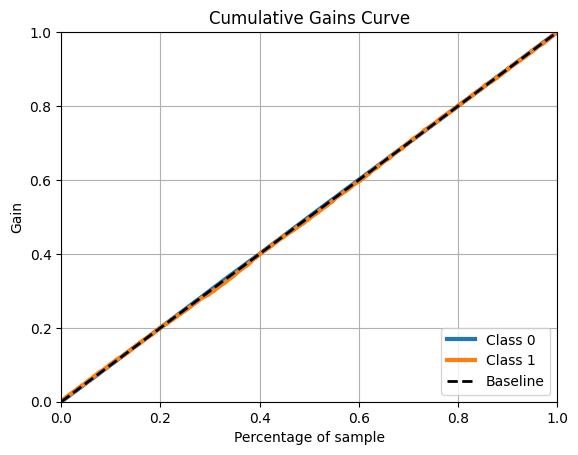

In [58]:
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

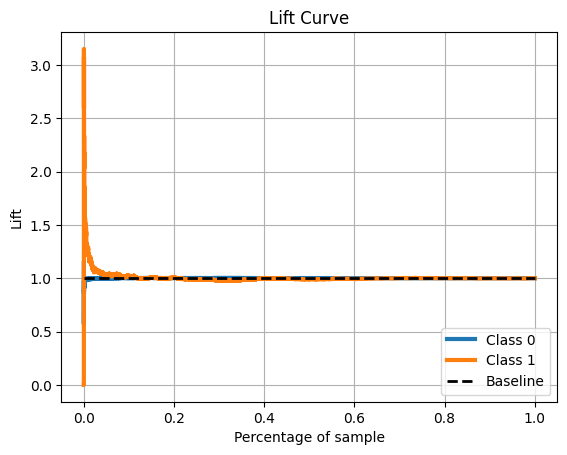

In [59]:
skplt.metrics.plot_lift_curve(y_val, yhat_knn)

# 7.2 Linear Regressor

In [60]:
# Model defnition
lr_model = lm.LogisticRegression( random_state=42 )

# model training
lr_model.fit( X_train, y_train )

# model predct
yhat_lr = lr_model.predict_proba( X_val )


In [61]:
# acumulative Gain

# Certifique-se de que y_val contém apenas duas classes para um problema de classificação binária
skplt.metrics.cumulative_gain_curve(y_val, yhat_lr[:, 1])  # yhat_lr[:, 1] para obter as probabilidades da classe positiva


(array([0.000000, 0.000013, 0.000026, ..., 0.999974, 0.999987, 1.000000]),
 array([0.000000, 0.000000, 0.000000, ..., 1.000000, 1.000000, 1.000000]))

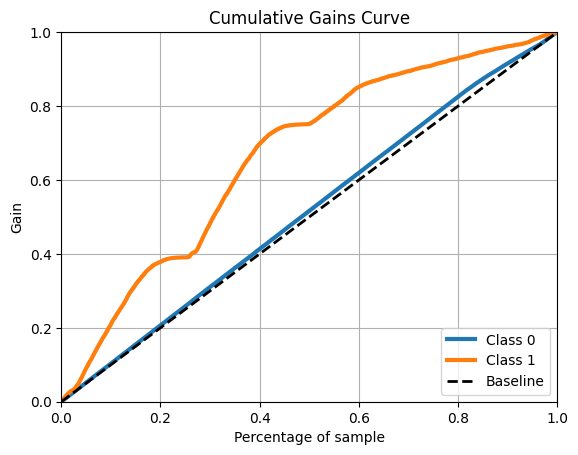

In [62]:
# Certifique-se de que y_val contém apenas duas classes para um problema de classificação binária
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr )
plt.show()

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

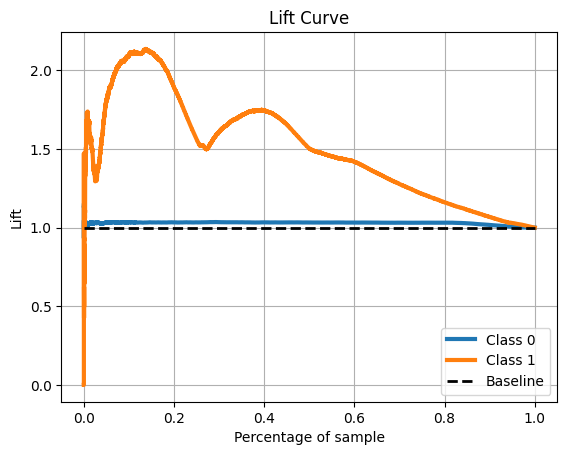

In [63]:
skplt.metrics.plot_lift_curve(y_val, yhat_lr)

# 7.2 Extra Trees

In [64]:
# Model definition
et = en.ExtraTreesClassifier( n_estimators=1000, n_jobs=-1, random_state=42 )

# Model fit
et.fit( X_train, y_train)

# Model predct
yhat_et = et.predict_proba( X_val )

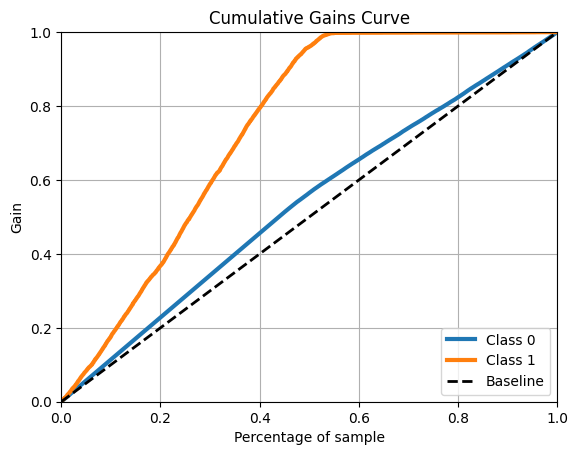

In [65]:
skplt.metrics.plot_cumulative_gain( y_val, yhat_et )
plt.show()

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

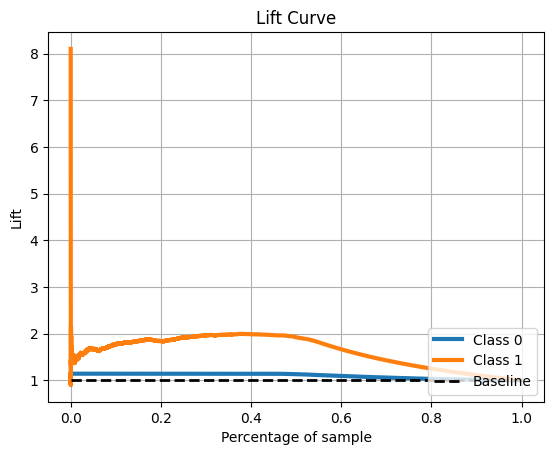

In [66]:
skplt.metrics.plot_lift_curve( y_val, yhat_et )

## 7.4 Randon Forest

In [67]:
# model definition
rf = en.RandomForestClassifier( n_estimators=1000, n_jobs=-1, random_state=42 )

# Model training
rf.fit( X_train, y_train )

# Model predction
yhat_rf = et.predict_log_proba( X_val )


/Users/hallanmiranda/Documents/repo/comunidade/pa004/env-pa004/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:913: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

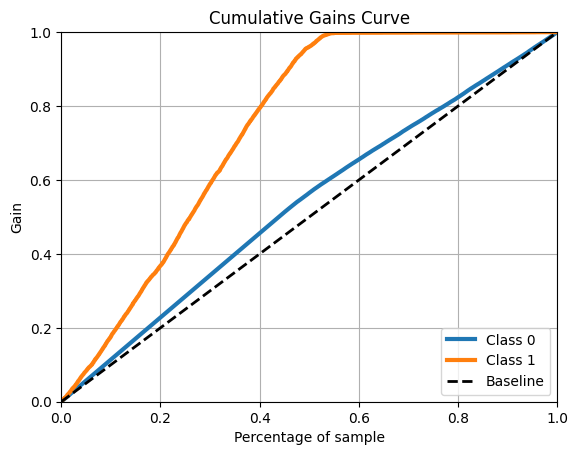

In [68]:
# Acumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_rf)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

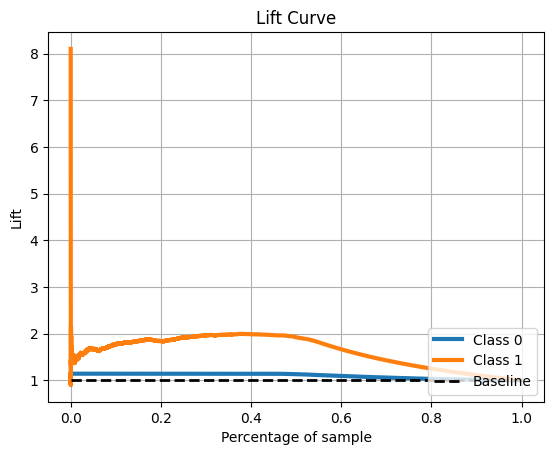

In [69]:
# lift Curve
skplt.metrics.plot_lift_curve( y_val, yhat_rf )

In [70]:
# Propencity Score, % Acc Propensity Score, % Base, % mean model, Lifit

# 8.0 Model Performace

In [71]:
df8 = df7.copy()

In [72]:
def precision_at_k(data, k=10):
    data = data.reset_index(drop=True)
    data['ranking'] = data.index + 1
    data['precision_at_k'] = data['response'].cumsum() / data['ranking']
    return data.loc[k, 'precision_at_k'], data

def recall_at_k(data, k=2000):
    data = data.reset_index(drop=True)
    data['ranking'] = data.index + 1
    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()
    return data.loc[k, 'recall_at_k'], data

# Restante do código...

# Computer precision at K
precision_at_20, data = precision_at_k(df8, k=20)
print('precision at k: {}'.format(precision_at_20))

# Computer recall at K
recall_at_15, data = recall_at_k(df8, k=15)
print('recall at k: {}'.format(recall_at_15))


precision at k: 0.23809523809523808
recall at k: 0.00010723860589812332


In [73]:
# y_true = np.array([0, 1, 2, 2])
# y_score = np.array([[0.5, 0.2, 0.2], # 0 is in top 2
#                    [0.3, 0.4, 0.2], # 1 is in top 2
#                    [0.2, 0.4, 0.3], # 2 is in top 2
#                    [0.7, 0.2, 0.1]]) # 2 isn't in top 2

# top_k_accuracy_score( y_true, y_score, k=2)

In [74]:
df5.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response',
       'vvehicle_age_below_1_year', 'vvehicle_age_between_1_2_year',
       'vvehicle_age_over_2_years'],
      dtype='object')

# Cummulative Curve Manually

In [75]:
# results = pd.DataFrame()
# results['predction'] = yhat_et[:, 1].tolist()
# results['real'] = y_val.to_list()


# # ordering by predction
# results = results.sort_values( 'prediction', ascending=False)

# #performace of interesset ( propensity )
# results['real_cum'] = results['real'].cumsum()
# results['real_cum_perc'] = 100*results['real_cum']/results['real'].sum()

# # Percentage of Base (Clients)
# results['base'] = range(1, len( results ) + 1)
# results['base_cum_perc'] = 100*results['base']/len( results )

# # Baseline model
# results['baseline'] = results['base_cum_perc']

# plt.figure( figsize=(12,8))
# sns.lineplot(x='base_cum_perc', y='real_cum_perc', data=results)
# sns.lineplot(x='base_cum_perc', y='baseline', data=results)




In [76]:
plt.figure( figsize=(12, 8) )


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

# 9.0 Deploy to prodution

In [77]:
# Save trained model 

pickle.dump( lr_model, open( '/Users/hallanmiranda/Documents/repo/comunidade/pa004/src/model/model_linear_regresion.pkl', 'wb' ) )

## 9.1 Health Insurance Class

In [86]:
# Construcao das Calsses:

class HealthInsurance:

    def __init__(self):
        self.home_path                          = '/Users/hallanmiranda/Documents/repo/comunidade/pa004/'
        self.annual_primium_scaler              = pickle.load( open( self.home_path + '../src/features/annual_primium_scaler.pkl'))
        self.age_scaler                         = pickle.load( open( self.home_path + '../src/features/age_scaler.pkl'))
        self.vintage_scaler                     = pickle.load( open( self.home_path + '../src/features/vintage_scaler.pkl'))
        self.target_encoder_gender_scaler       = pickle.load( open( self.home_path + '../src/features/target_encoding_gender_scaler.pkl'))
        self.target_encoder_region_code_scaler  = pickle.load( open( self.home_path + '../src/features/target_encoding_region_code_scaler'))
        self.fe_policy_sales_channel_scaler     = pickle.load( open( self.home_path + '../src/features/fe_policy_sales_channel_scaler'))

    def data_cleaning(self, df1):
        # 1.1 Raneme Columns
        cols_new =  ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response',
       'vvehicle_age_below_1_year', 'vvehicle_age_between_1_2_year']  
        df1.columns = cols_new
        return df1
    
    def feature_engineering( self, df2):
        # Convertendo a coluna para tipo string
        df2['vehicle_damage'] = df2['vehicle_damage'].map({'Yes': 1, 'No': 0})

        # Transformando em over e betwen
        df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' 
                                                                       if x == '1-2 Year' else 'below_1_year')
        return df2

    
    def data_preparation(df5):

        # annual_premium 
        df5[ 'annual_premium' ] = self.annual_premium_scaler.fit_transform( df5[ [ 'annual_premium' ] ].values )    

        # age
        df5['age'] = self.age_scaler.fit_transform(df5[['age']].values)

        # vintage
        df5['vintage'] = self.vintage_scaler.fit_transform(df5[['vintage']].values)

        # gender - One Hot encoding / Target Encoding
        df5.loc[:, 'gender' ] = df5['gender'].map(self.target_encoder_gender_scaler )

        # region_code One hot Encoding / Frequency Encoding / Target Encoding
        df5.loc[:, 'region_code'] = df5['region_code'].map(self.target_encoder_region_code_scaler )

        # policy_sales_channel
        df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( self.fe_policy_sales_channel_scaler )

        # Vehicle - One hot encoding . frequency Ecoding 
        df5 = pd.get_dummies( df5, prefix='vvehicle_age', columns=['vehicle_age'])

        cols_selected = [ 'vintage','annual_premium','age','region_code','vehicle_damage','policy_sales_channel','previously_insured' ]

        
        return df5[ cols_selected ]
    

    def get_prediction( self, model, original_data, test_data ):
        # model predction
        pred = model.predict_proba( test_data )
        # join prediction into original data
        original_data['prediction'] = pred
        
        return original_data.to_json( orient='records', data_format='iso')

        

# 9.2 API Handler

In [87]:
import pickle
import pandas as pd
from flask import Flask, request, Response


In [88]:
from healthinsurance import HealthInsurance

In [93]:
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8080)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://192.168.0.100:8080
Press CTRL+C to quit


In [90]:
# Carregando o Modelo
caminho = '/Users/hallanmiranda/Documents/repo/comunidade/pa004/'
modelo = pickle.load( open( caminho + 'src/model/model_linear_regresion.pkl', 'rb'))

# Inicializando a Instância da API
app = Flask( __name__ )

# Endpoint = /predict (acessar essa função já executa o health_insurance)
@app.route( '/predict', methods=['POST'] )

def health_insurace_predict():
    # Obtém o JSON da solicitação POST
    teste_json = request.get_json()

    if teste_json: # há dados = se houver dados
        if isinstance( teste_json, dict ): # exemplo único = eu testo o JSON para ver se é um tipo de dicionário
            teste_raw = pd.DataFrame( teste_json, index=[0] ) # cria um DataFrame e define o índice como 0

        else: # exemplo múltiplo == se ele existir, há uma linha ou várias
            teste_raw = pd.DataFrame( teste_json, columns=teste_json[0].keys() )

            # Instancia a classe HealthInsurance
            pipeline = HealthInsurance()

            # Limpeza dos dados
            df1 = pipeline.data_cleaning( teste_raw )

            # Engenharia de características
            df2 = pipeline.feature_engineering( df1 )

            # Preparação dos dados
            df3 = pipeline.data_preparation( df2 )

            # Predição
            df_resposta = pipeline.get_prediction( modelo, teste_raw, df3 )

            return df_resposta
        
    else:
        return Response( '{}', status=200, mimetype='application/json' )
    
if __name__ == '__main__':
    app.run('0.0.0.0', port=800)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:800
 * Running on http://192.168.0.100:800
Press CTRL+C to quit


# 9.3. API Tester

In [94]:
import requests

In [95]:
# loading test dataset
df_test = X_validation
df_test['response'] = y_validation

In [96]:
df_test = df_test.sample(10)

In [97]:
df_test

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,vehicle_age_below_1_year,vehicle_age_between_1_2_year,vehicle_age_over_2_years,policy_sale_channel,response
148973,148974,0.103392,30,1,0.073842,0,1,-1.617281,26.0,134,True,False,False,0.209284,0
264752,264753,0.103392,22,1,0.120858,1,0,-0.104546,152.0,229,True,False,False,0.353747,0
85028,85029,0.138429,50,1,0.096027,1,0,1.300120,124.0,162,False,True,False,0.194019,0
293756,293757,0.138429,45,1,0.043799,0,1,-0.244914,124.0,206,False,True,False,0.194019,0
170964,170965,0.138429,80,1,0.186182,1,1,1.287964,122.0,97,False,True,False,0.026092,0
42714,42715,0.138429,54,1,0.186182,0,1,0.628321,26.0,189,False,True,False,0.209284,1
79611,79612,0.138429,27,1,0.185232,1,0,2.123980,152.0,174,True,False,False,0.353747,0
143854,143855,0.138429,51,1,0.186182,0,1,0.190256,124.0,131,False,True,False,0.194019,0
295348,295349,0.103392,77,1,0.186182,0,1,-0.141244,124.0,73,False,True,False,0.194019,0
379099,379100,0.138429,37,1,0.121609,1,0,0.103430,29.0,84,False,True,False,0.002194,0


In [101]:
# Converter dataframe em json 
data = json.dumps( df_test.to_dict( orient='records') )

In [102]:
data

'[{"id": 148974, "gender": 0.10339211862772409, "age": 30, "driving_license": 1, "region_code": 0.07384183434721572, "previously_insured": 0, "vehicle_damage": 1, "annual_premium": -1.6172811731820864, "policy_sales_channel": 26.0, "vintage": 134, "vehicle_age_below_1_year": true, "vehicle_age_between_1_2_year": false, "vehicle_age_over_2_years": false, "policy_sale_channel": 0.2092840954189585, "response": 0}, {"id": 264753, "gender": 0.10339211862772409, "age": 22, "driving_license": 1, "region_code": 0.12085822922324824, "previously_insured": 1, "vehicle_damage": 0, "annual_premium": -0.1045460891397355, "policy_sales_channel": 152.0, "vintage": 229, "vehicle_age_below_1_year": true, "vehicle_age_between_1_2_year": false, "vehicle_age_over_2_years": false, "policy_sale_channel": 0.3537474539747513, "response": 0}, {"id": 85029, "gender": 0.13842897517072403, "age": 50, "driving_license": 1, "region_code": 0.0960272249759562, "previously_insured": 1, "vehicle_damage": 0, "annual_prem

## Modelo em produçao

In [110]:
# # Api Call
# url = 'http://127.0.0.1:800/predict'  # Ajuste a porta para a porta em que sua aplicação Flask está rodando

# header = {'Content-type': 'application/json'}

# r = requests.post( url, data=data, header=header)
# print(' Status Code {} '.format( r.status_code ) )

In [109]:
# Após o status 200
# dl = pd.DataFrame( r, json(), columns=r.status()[0].keys() )
# dl.sort_values ( 'predict', ascending=True).head()

In [ ]:
# import numpy as np
# from scipy.stats import ttest_ind

# # Simulação de dados - Vendas por dia antes e depois da campanha
# vendas_antes = np.random.normal(loc=50, scale=10, size=30)  # Média de 50 unidades, desvio padrão de 10
# vendas_depois = np.random.normal(loc=80, scale=15, size=30)  # Média de 80 unidades, desvio padrão de 15

# # Aplicação do teste t de Student
# resultado_tteste, p_valor = ttest_ind(vendas_antes, vendas_depois)

# # Exibição dos resultados
# print("Resultado do teste t:", resultado_tteste)
# print("P-valor:", p_valor)

# # Interpretação dos resultados
# nivel_significancia = 0.05

# if p_valor < nivel_significancia:
#     print("Rejeitamos a hipótese nula. Há evidências estatísticas de diferença nas vendas antes e depois da campanha.")
# else:
#     print("Não rejeitamos a hipótese nula. Não há evidências estatísticas de diferença nas vendas antes e depois da campanha.")
